In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

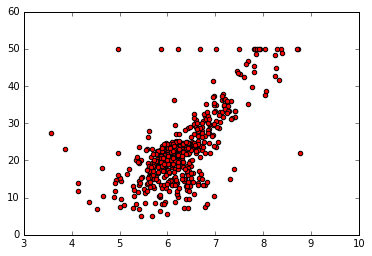

In [3]:
plt.scatter(boston.data[:,5], boston.target, c='r')
plt.show()

In [4]:
x = boston.data[:,5]

In [5]:
x = np.array([[v] for v in x])

In [6]:
y = boston.target

In [7]:
slope,_,_,_ = np.linalg.lstsq(x,y)

In [8]:
slope

array([ 3.6533504])

In [9]:
x = boston.data[:,5]

In [10]:
x = np.array([[v,1] for v in x])

In [11]:
y = boston.target

In [12]:
(slope,bias),_,_,_ = np.linalg.lstsq(x,y)

In [13]:
slope,bias

(9.1021089811803151, -34.670620776438582)

In [14]:
(slope, bias),total_error,_,_ = np.linalg.lstsq(x,y)

In [16]:
rmse = np.sqrt(total_error[0]/len(x))

In [17]:
rmse

6.6030713892225616

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression(fit_intercept=True)

In [22]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
p = map(lr.predict, x)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single samp

In [24]:
e = p - y

In [26]:
total_error = np.sum(e * e)

In [27]:
total_error

37622271.160219923

In [28]:
rmse_train = np.sqrt(total_error/len(p))

In [29]:
rmse_train

272.67620825053507

In [30]:
print('RMSE on training: {}'.format(rmse_train))

RMSE on training: 272.676208251


In [31]:
from sklearn.cross_validation import KFold

In [32]:
kf = KFold(len(x), n_folds=10)
err = 0

In [33]:
for train,test in kf:
    lr.fit(x[train], y[train])
    p = map(lr.predict, x[test])
    e = p-y[test]
    err += np.sum(e*e)
rmse_10cv = np.sqrt(err/len(x))
print('RMSE on 10-fold CV: {}'.format(rmse_10cv))

RMSE on 10-fold CV: 65.462120348


/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single samp